# Import packages

In [8]:
# Import packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras.backend as K
import plotly.graph_objs as go
import plotly.io as pio

from pandas import DataFrame

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

%matplotlib inline

# Set figure parameters
plt.rcParams['figure.figsize'] = [10, 7.5]

# Input data

[*********************100%%**********************]  1 of 1 completed


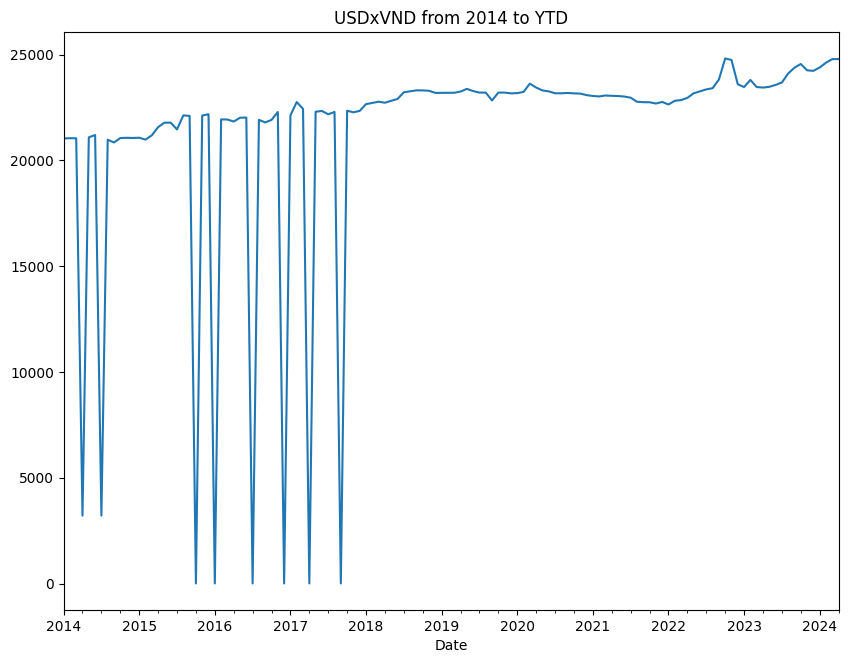

Total data: 10 years


In [9]:
yf.pdr_override()

data = wb.get_data_yahoo('VND=x', start = '2014-01-01', end = '2024-12-31', interval = '1mo')

# Plot
data['Adj Close'].plot()
plt.title("USDxVND from 2014 to YTD")
plt.show()

# Summary statistics
df = pd.DataFrame(data['Adj Close']) 

diff = df.index.values[-1] - df.index.values[0]
months = diff.astype('timedelta64[M]')
years = int(months/12)
print("Total data: %d years" %years)

# Processing data

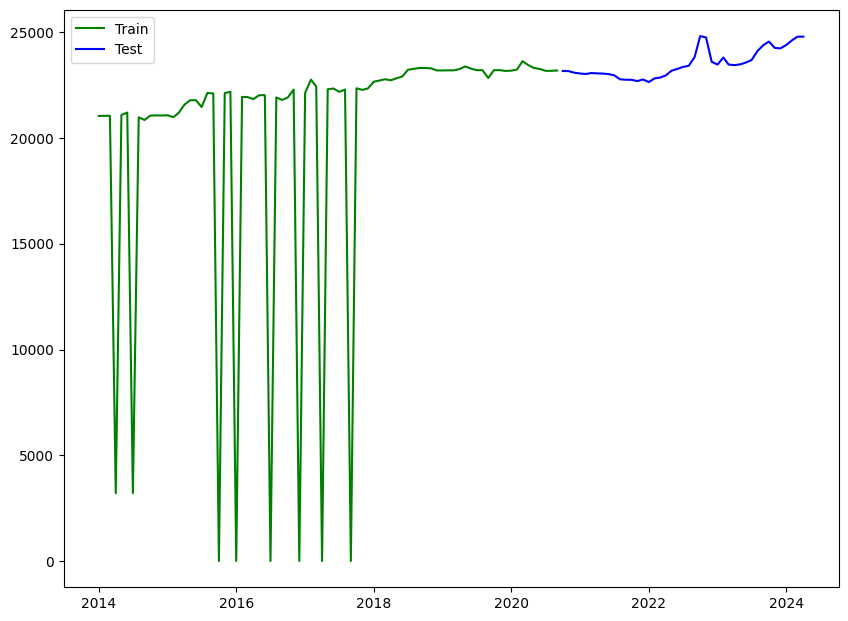

In [10]:
# Seperate into train and test data
to_row = int(len(df)*0.66)

df_train = pd.DataFrame(df[0:to_row]['Adj Close'])
df_test = pd.DataFrame(df[to_row:]['Adj Close'])

# Plot
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test')
plt.legend()
plt.show()

In [11]:
# Data normalisation - rescale data to make mean of observed values 0 

sc = StandardScaler()
train_sc = sc.fit_transform(df_train)
test_sc = sc.fit_transform(df_test)

In [12]:
# Further segregate train and test data

x_train = train_sc[:-1]
y_train = train_sc[1:]

x_test = test_sc[:-1]
y_test = test_sc[1:]

# Modelling ANN

In [13]:
# Create sequential model
K.clear_session()
n_features = x_train.shape[1]
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.summary()

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile and fit the model

model.compile(loss=tf.keras.metrics.mean_squared_error, metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)
history = model.fit(x_train, y_train, epochs = 200, batch_size = 1, verbose = 1, callbacks = [early_stop], shuffle = False)                

Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 1.2628 - rmse: 1.1070
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 1.2629 - rmse: 1.1069
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 1.2713 - rmse: 1.1101
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 1.2767 - rmse: 1.1122
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 1.2803 - rmse: 1.1136
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 1.2824 - rmse: 1.1144
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 1.2835 - rmse: 1.1148
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 1.2837 - rmse: 1.1150
Epoch 9/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 1.2834 - rmse: 1.1149
Epoch 10/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 1.2827 - rmse: 1.1146
Epoch 11/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 1.2817 - rmse: 1.1142
Epoch 12/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 1.2804 - rmse: 1.1138
E

In [19]:
# Initialise ANN
ann_model = tf.keras.Sequential()

# Add input layer and first hidden layer
ann_model.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Add second hidden layer
ann_model.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [21]:
# Compiling the ANN
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Predicting the test results
y_pred = ann_model.predict(x_test)
y_pred = (y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 
[[ 0.         -0.5236446 ]
 [ 0.         -0.63140874]
 [ 0.         -0.69127771]
 [ 0.         -0.72570236]
 [ 0.         -0.65834978]
 [ 0.         -0.68229736]
 [ 0.         -0.69576788]
 [ 0.         -0.73318598]
 [ 0.         -0.81550581]
 [ 0.         -1.0998834 ]
 [ 0.         -1.13281133]
 [ 0.         -1.1373015 ]
 [ 0.         -1.22710495]
 [ 0.         -1.11485064]
 [ 0.         -1.29445753]
 [ 0.         -1.03253081]
 [ 0.         -0.98164219]
 [ 0.         -0.82897633]
 [ 0.         -0.49969702]
 [ 0.         -0.36648857]
 [ 0.         -0.22729322]
 [ 0.         -0.14197995]
 [ 0.          0.46419333]
 [ 1.          1.96091747]
 [ 1.          1.85614678]
 [ 1.          0.13491402]
 [ 1.         -0.05966012]
 [ 0.          0.44174247]
 [ 1.         -0.05966012]
 [ 0.         -0.09707822]
 [ 0.         -0.04469288]
 [ 0.          0.08851557]
 [ 1.          0.26213557]
 [ 1.          0.89824333]
 [ 1.          1.30984247]
 [ 1.          1

In [27]:
# Confusion  matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [28]:
y_true

NameError: name 'y_true' is not defined

In [29]:
y_test

array([[-0.5236446 ],
       [-0.63140874],
       [-0.69127771],
       [-0.72570236],
       [-0.65834978],
       [-0.68229736],
       [-0.69576788],
       [-0.73318598],
       [-0.81550581],
       [-1.0998834 ],
       [-1.13281133],
       [-1.1373015 ],
       [-1.22710495],
       [-1.11485064],
       [-1.29445753],
       [-1.03253081],
       [-0.98164219],
       [-0.82897633],
       [-0.49969702],
       [-0.36648857],
       [-0.22729322],
       [-0.14197995],
       [ 0.46419333],
       [ 1.96091747],
       [ 1.85614678],
       [ 0.13491402],
       [-0.05966012],
       [ 0.44174247],
       [-0.05966012],
       [-0.09707822],
       [-0.04469288],
       [ 0.08851557],
       [ 0.26213557],
       [ 0.89824333],
       [ 1.30984247],
       [ 1.56877574],
       [ 1.12275195],
       [ 1.08533385],
       [ 1.32480971],
       [ 1.66157264],
       [ 1.91601574],
       [ 1.91601574]])

In [30]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])